<a href="https://colab.research.google.com/github/chaeiJeon/PySnippetVault/blob/main/accuracyprecisionanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = [[ 3.6,  4.5,  5.8,  3.6,  0.1 ],
 [ 5.1,  4.1,  3.2,  4.1,  6.7 ],
 [ 2.0,  2.2,  1.4,  1.0,  1.4 ],
 [ 1.0,  0.2,  0.3,  0.2,  0.3 ],
 [ 7.2,  5.8,  7.6,  3.6,  3.5 ],
 [ 5.4,  5.1,  6.7,  5.0,  4.5 ],
 [ 8.1,  8.0,  8.2,  2.2,  3.6 ],
 [ 1.4,  1.2,  1.0,  4.1,  2.2 ],
 [ 1.4,  1.1,  1.1,  4.0,  2.2 ],
 [ 1.0,  2.0,  2.2,  2.0,  2.0 ],
 [ 1.3,  3.0,  1.8,  2.2,  3.0 ],
 [ 2.2,  2.2,  2.1,  5.8,  2.2 ],
 [ 1.0,  2.0,  1.0,  0.5,  0.4 ],
 [ 0.0,  0.0,  0.0,  0.2,  0.0 ],
 [ 2.2,  2.0,  1.0,  3.2,  2.8 ],
 [ 2.0,  1.0,  0.5,  0.0,  1.0 ],
 [ 0.0,  0.0,  0.6,  0.6,  0.0 ],
 [ 0.1,  9.1,  4.5,  3.2, 18.2 ],
 [ 2.2,  2.0,  8.2, 15.6, 11.2 ],
 [ 7.1,  2.0,  2.0,  2.2, 16.6 ],
 [ 2.0,  2.0,  4.1,  3.0, 17.9 ]]

In [ ]:
def drawAccuracyPlot(df, title, ax):
    for col in df.columns:
        ax.plot(df.index, df[col], 'o')

    ax.axhline(margin_of_error, color='red', linestyle='--', label=f'Accuracy Limit (+{margin_of_error}px)')
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('Trial')
    ax.set_ylabel('Error Value')
    ax.set_ylim(0, 10)
    ax.set_title(title)

In [ ]:
def drawDensityPlot(df, title, ax):
    sns.kdeplot(result_df, fill=True)
    ax.axvline(margin_of_error, color='red', linestyle='--', label=f'Precision Limit (+{margin_of_error}px)')
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('Error Value')
    ax.set_xlim(0, 10)

In [ ]:
# 데이터 셋업
data_df = pd.DataFrame(data)

# 열별 평균 계산
mean_values = data_df.mean(axis=1)

# 오차 범위 정의
margin_of_error = 5

# 편차값
deviation_df = data_df.sub(mean_values, axis=0).abs()

# IQR 계산을 위한 Q1, Q3 계산
q1, q3 = np.percentile(deviation_df, [25, 75], axis=0)
iqr = q3 - q1

# 이상치 제거 범위 설정
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 제거
filtered_df = deviation_df[(deviation_df >= lower_bound) & (deviation_df <= upper_bound)]

# 1차원 배열로 변환 및 NaN 값 제거
flattened_array = filtered_df.values.flatten()
result_df = pd.DataFrame({'Error Value': flattened_array}).dropna()

# 전체 정확도 계산
filtered_accuracy = (filtered_df <= margin_of_error).mean(axis=1)*100
result_accuracy = (result_df <= margin_of_error).mean(axis=1)*100

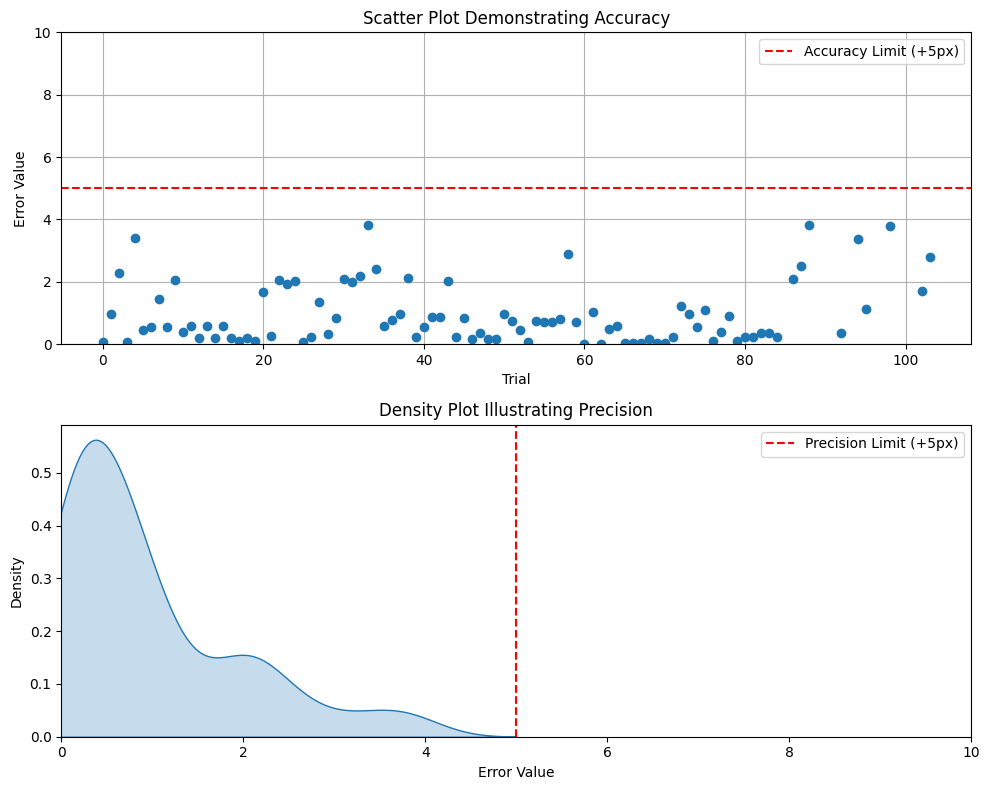

In [ ]:
# 점 그래프 그리기
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

drawAccuracyPlot(result_df, 'Scatter Plot Demonstrating Accuracy', axs[0])
drawDensityPlot(result_df, 'Density Plot Illustrating Precision', axs[1])

# 밀도 플롯 그리기
plt.tight_layout()
plt.show()